In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler


from xgboost import XGBClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)

In [10]:
data = pd.read_csv("FinalDataset.csv")
data.head()

,Start Timestamp,End Timestamp,Mean,Max,Standard Deviation,RMS,Kurtosis,Skewness,Peak-to-Peak,Abs Diff Signal,Zero Crossing Rate,Entropy,Spectral Centroid,Spectral Spread,Spectral Skewness,Spectral Kurtosis,Alpha Power,Beta Power,Gamma Power,Delta Power,Theta Power,MU FFT 1,MU FFT 2,MU FFT 3,MU FFT 4,MU FFT 5,MU FFT 6,FFT_0,FFT_1,FFT_2,FFT_3,FFT_4,FFT_5,FFT_6,FFT_7,FFT_8,FFT_9,FFT_10,FFT_11,FFT_12,FFT_13,FFT_14,FFT_15,FFT_16,FFT_17,FFT_18,FFT_19,FFT_20,FFT_21,FFT_22,FFT_23,FFT_24,FFT_25,FFT_26,FFT_27,FFT_28,FFT_29,FFT_30,FFT_31,FFT_32,FFT_33,FFT_34,FFT_35,FFT_36,FFT_37,FFT_38,FFT_39,FFT_40,FFT_41,FFT_42,FFT_43,FFT_44,FFT_45,FFT_46,FFT_47,FFT_48,FFT_49,FFT_50,FFT_51,FFT_52,FFT_53,FFT_54,FFT_55,FFT_56,FFT_57,FFT_58,FFT_59,FFT_60,FFT_61,FFT_62,FFT_63,FFT_64,FFT_65,FFT_66,FFT_67,FFT_68,FFT_69,FFT_70,FFT_71,FFT_72,FFT_73,FFT_74,FFT_75,FFT_76,FFT_77,FFT_78,FFT_79,FFT_80,FFT_81,FFT_82,FFT_83,FFT_84,FFT_85,FFT_86,FFT_87,FFT_88,FFT_89,FFT_90,FFT_91,FFT_92,FFT_93,FFT_94,FFT_95,FFT_96,FFT_97,FFT_98,FFT_99,FFT_100,FFT_101,FFT_102,FFT_103,FFT_104,FFT_105,FFT_106,FFT_107,FFT_108,FFT_109,FFT_110,FFT_111,FFT_112,FFT_113,FFT_114,FFT_115,FFT_116,FFT_117,FFT_118,FFT_119,FFT_120,FFT_121,FFT_122,FFT_123,FFT_124,Label
0,1.005,1.997,3.17224,5.81,2.116479,3.813475,-1.139828,-0.407959,6.78,12.51,0.008065,4.621786,7.915053e-17,11.506736,8.646783e-17,15.905176,16.482459,29.164703,27.023954,252.506596,35.016776,4.499943,3.491304,3.104656,2.769917,2.616639,2.108451,396.53,180.335878,41.639898,19.052146,11.478673,7.887080,6.354283,4.796797,4.499943,3.491304,3.104656,2.769917,2.616639,2.108451,1.815169,1.795626,1.703994,1.603161,2.023217,1.438583,1.588850,1.427343,1.275864,1.756951,1.255754,1.406794,1.144274,0.927040,1.258536,0.780605,1.237852,1.295567,1.073160,1.043258,0.788741,1.104398,0.700579,0.554516,0.461228,0.653684,1.075498,0.849716,0.316466,0.418412,1.294502,0.841256,0.726956,0.832366,0.915001,0.501227,1.181199,0.802611,0.923039,1.035393,0.561483,0.745682,0.849702,0.685676,0.708091,0.390653,0.794000,0.990708,0.671335,0.671335,0.990708,0.794000,0.390653,0.708091,0.685676,0.849702,0.745682,0.561483,1.035393,0.923039,0.802611,1.181199,0.501227,0.915001,0.832366,0.726956,0.841256,1.294502,0.418412,0.316466,0.849716,1.075498,0.653684,0.461228,0.554516,0.700579,1.104398,0.788741,1.043258,1.073160,1.295567,1.237852,0.780605,1.258536,0.927040,1.144274,1.406794,1.255754,1.756951,1.275864,1.427343,1.588850,1.438583,2.023217,1.603161,1.703994,1.795626,1.815169,2.108451,2.616639,2.769917,3.104656,3.491304,4.499943,4.796797,6.354283,7.887080,11.478673,19.052146,41.639898,180.335878,0
1,1.504,2.492,-0.25152,4.97,2.553746,2.566102,-1.043102,0.577409,8.25,9.68,0.008065,4.674090,1.849309e-16,21.663058,-7.203341e-18,4.468349,86.992567,165.913938,152.900818,361.756801,144.707032,21.130172,18.893999,16.966722,16.069374,13.932300,13.815941,31.44,183.133061,82.934784,53.919164,41.769792,32.080842,27.830085,21.896142,21.130172,18.893999,16.966722,16.069374,13.932300,13.815941,11.726755,10.730286,10.521149,10.389946,9.494342,9.021309,8.321060,7.984029,7.411597,6.765483,7.587430,6.884598,6.358727,6.489163,6.562046,6.044373,5.873404,5.768186,6.064669,5.157655,5.322839,5.226877,5.178806,5.534202,4.607454,5.092286,4.704247,4.626235,4.669192,5.082487,4.770991,4.119676,4.866121,4.068882,4.347479,3.926660,3.985600,4.476313,4.186460,4.079920,4.519200,4.061196,3.914822,4.489727,3.872806,4.264703,3.899907,3.944439,4.197379,4.197379,3.944439,3.899907,4.264703,3.872806,4.489727,3.914822,4.061196,4.519200,4.079920,4.186460,4.476313,3.985600,3.926660,4.347479,4.068882,4.866121,4.119676,4.770991,5.082487,4.669192,4.626235,4.704247,5.092286,4.607454,5.534202,5.178806,5.226877,5.322839,5.157655,6.064669,5.768186,5.873404,6.044373,6.562046,6.489163,6.358727,6.884598,7.587430,6.765483,7.411597,7.984029,8.321060,9.021309,9.494342,10.389946,10.521149,10.730286,11.726755,13.815941,13.932300,16.069374,16.966722,18.893999,21.130172,21.896142,27.830085,32.080842,41.769792,53.919164,82.934784,183.

array([[<Axes: title={'center': 'Start Timestamp'}>,
        <Axes: title={'center': 'End Timestamp'}>,
        <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Max'}>,
        <Axes: title={'center': 'Standard Deviation'}>,
        <Axes: title={'center': 'RMS'}>,
        <Axes: title={'center': 'Kurtosis'}>,
        <Axes: title={'center': 'Skewness'}>,
        <Axes: title={'center': 'Peak-to-Peak'}>,
        <Axes: title={'center': 'Abs Diff Signal'}>,
        <Axes: title={'center': 'Zero Crossing Rate'}>,
        <Axes: title={'center': 'Entropy'}>],
       [<Axes: title={'center': 'Spectral Centroid'}>,
        <Axes: title={'center': 'Spectral Spread'}>,
        <Axes: title={'center': 'Spectral Skewness'}>,
        <Axes: title={'center': 'Spectral Kurtosis'}>,
        <Axes: title={'center': 'Alpha Power'}>,
        <Axes: title={'center': 'Beta Power'}>,
        <Axes: title={'center': 'Gamma Power'}>,
        <Axes: title={'center': 'Delta Power'}>,
      

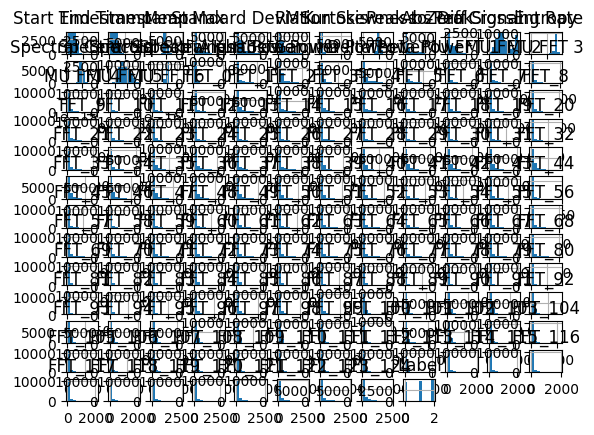

In [11]:
data.hist()

In [12]:
features_to_drop = ['Gamma Power', 
                    "Theta Power", 
                    "Start Timestamp",
                    "End Timestamp"]

In [13]:
filtered = data.drop(columns=features_to_drop)
filtered.columns

Index(['Mean', 'Max', 'Standard Deviation', 'RMS', 'Kurtosis', 'Skewness',
       'Peak-to-Peak', 'Abs Diff Signal', 'Zero Crossing Rate', 'Entropy',
       ...
       'FFT_116', 'FFT_117', 'FFT_118', 'FFT_119', 'FFT_120', 'FFT_121',
       'FFT_122', 'FFT_123', 'FFT_124', 'Label'],
      dtype='object', length=149)

In [14]:
X = filtered.drop("Label", axis=1)
y = filtered["Label"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2, random_state=32, shuffle=True)
print('Train shape:', X_train.shape)
print('Test Shape:', X_test.shape)

Train shape: (10385, 148)
Test Shape: (2597, 148)


In [16]:
param_grid = {
    'learning_rate': np.arange(0.1, 0.5, 0.2),
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 5, 8],
    'min_child_weight': np.arange(1, 5, 2),
}

# Create XGBoost model and GridSearchCV object
model = XGBClassifier()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=3)

# Fit the grid search to your training data (X, y)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=100;, score=0.506 total time=   6.2s
[CV 2/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=100;, score=0.536 total time=   8.3s
[CV 3/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=100;, score=0.509 total time=  10.8s
[CV 4/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=100;, score=0.525 total time=   5.5s
[CV 5/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=100;, score=0.519 total time=   5.7s
[CV 1/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=200;, score=0.514 total time=  10.3s
[CV 2/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=200;, score=0.529 total time=  11.0s
[CV 3/5] END learning_rate=0.1, max_depth=None, min_child_weight=1, n_estimators=200;, score=0.513 total time=  

KeyboardInterrupt: 

In [17]:
params = grid_search.best_params_
params

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [33]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.5471698113207547